# Intro to Causal Inference


<img width=80 src="Images/Assembler.png">

# Define causal inference
Causal inference is a field of study interested in measuring the effect of a certain treatment.

Another way to think about causal inference, is that it answers what-if questions. The goal is always to measure some kind of impact given a certain action.

Examples of questions answered with causal inference are:

- What is the impact of running an ad campaign on product sales?
- What is the effect of smoking on lung cancer?
- Does human intervention affects global climate?

# Causal inference vs traditional machine learning

With traditional machine learning techniques, we generate predictions or forecasts given a set of features.

Machine Learning models uncover correlations between features and a target to better predict that target. In that sense, any correlation between some feature and the target is useful if it allows the model to make better predictions.

**Limitations:** While ML models are excellent at prediction, they don't inherently understand causation. A model might find that ice cream sales and shark attacks are correlated (both increase in the summer) but cannot infer that ice cream sales do not cause shark attacks.

When it comes to causal inference, we aim to understand and measure the impact of an intervention or treatment. Therefore, causal inference focuses on uncovering causal pathways, seeking causality rather than mere correlation.

# What is a Ramdomized Controlled Trial?

A randomized controlled trial (RCT) is a prospective experimental design that randomly assigns participants to an experimental or control group. RCTs are the gold standard for establishing causal relationships and ruling out confounding variables and selection bias. Researchers must be able to control who receives the treatments and who are the controls to use this design.

Control groups — generally are not given any medicine, whereas treatment group receives the specific treatment. And then they measure they observe the effectiveness of the improvement in these groups. If they find some positive results, voila sometimes breakthrough results for some disease do happen (after years and years of such experiments).

But.... What if we're testing some effects or radiation over humans? Should we force to smoke to a group of people? Of course not. This is where Causal Inference has its role. It tries to find causal relation or causal paths in data.

# Causal Connections

The causal pathway can be depicted as:

<img src="Images/causal_relation.jpg">



In the figure, offering a discount is called the <strong>treatment</strong> (denoted as the variable T in equations). Discounts may have some effect on the ice cream sales. This is designated as the **outcome** (denoted as Y in equations).

# What is a Bayesian Network?

[Bayesian networks](https://en.wikipedia.org/wiki/Bayesian_network) are a type of probabilistic graphical model that uses Bayesian inference for probability computations. 

A Bayesian network is a directed acyclic graph in which each edge corresponds to a conditional dependency, and each node corresponds to a unique random variable. Formally, if an edge (A, B) exists in the graph connecting random variables A and B, it means that P(B|A) is a factor in the joint probability distribution, so we must know P(B|A) for all values of B and A in order to conduct inference. 

<img src="Images/BN.png">

In the above example, since Rain has an edge going into WetGrass, it means that P(WetGrass|Rain) will be a factor, whose probability values are specified next to the WetGrass node in a conditional probability table.

**More information on the deep learning side:** https://en.wikipedia.org/wiki/Deep_belief_network 

# What is a Confounder?

A **confounder** is a variable that influences both the treatment and the outcome.

<img src="Images/confounder.jpg">

From the figure above, we can see that the confounder influences both the treatment and the outcome. Therefore, it can introduce a bias when measuring the treatment effect.

# Measure the treatment effect

Until now, we know that causal inference helps us measure the treatment effect on a certain outcome, but we have to watch out for confounders, as they can introduce a bias in our measurement.

To measure the treatment effect, there are three broad methods:

- <a href="https://en.wikipedia.org/wiki/Randomized_experiment">Randomized experiments</a>, which randomly assign subjects to treatment and control groups to mitigate the influence of confounders. 
- <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/">Measure confounders</a>, a method that involves identifying and adjusting for confounding variables to isolate the treatment's effect.
- <a href="https://en.wikipedia.org/wiki/Instrumental_variables_estimation">Instrument variables</a>, a technique used when randomization is not possible, leveraging variables that influence the treatment but are not directly related to the outcome.

Need more?

**Chech this** for an extensive explanation:
    
    https://medium.com/data-science-at-microsoft/causal-inference-part-1-of-3-understanding-the-fundamentals-816f4723e54a

# Causal Inference Programming

## Libraries

First import the required libraries. More info on <a href="https://www.pywhy.org/dowhy/v0.8/getting_started/intro.html">Dowhy</a> and <a href="https://www.pywhy.org/">PyWhy</a>

- **dowhy** is a Python library that simplifies causal inference by providing a structured approach to estimate the causal effect of a treatment on an outcome. It's built on the idea that causal inference can be divided into four main steps: model specification, identification, estimation, and refutation.

    **DoWhy** stands out for its emphasis on explicitly modeling causal assumptions and providing a framework to systematically address causal questions. It integrates well with other Python libraries for data analysis and machine learning, making it a valuable tool for researchers and practitioners looking to apply causal inference in their work.

In [1]:
# !pip install dowhy
# !pip install seaborn

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import dowhy
from dowhy import CausalModel
import dowhy.datasets

import warnings
warnings.filterwarnings('ignore')

c:\Users\Luciano Gabbanelli\anaconda3\envs\Assembler\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Synthetic data

In the field of causal inference, the ideal scenario is to apply our models to real-world datasets to uncover the underlying causal relationships. However, obtaining such datasets can be challenging due to their complexity and the stringent requirements for accurate causal analysis. Real datasets often come with issues like missing data, confounding variables, and measurement errors, all of which complicate the modeling process.

In this notebook, we will be using synthetic data generated with DoWhy library. This approach allows us to create controlled scenarios where we can easily manipulate and understand the causal mechanisms at play. By using synthetic data, we can simulate various complexities typical of real-world data while ensuring that the data adheres to specific causal structures we wish to explore.

It's important to note that while synthetic data does not capture the full unpredictability and variability of real-world data, it provides a valuable learning environment.

Here, we have:

- **BETA:** Treatment effect. A value of 8 means the treatment has a substantial positive effect on the outcome.

- **Confounders:** The number of variables that affect both the treatment and the outcome; `W0` and `W1`.

- **Instrumental variables:** The number of instrumental variables, which are used when it's not possible to randomly assign treatments. You've set this to 1; `Z0`.

- **Features:** Variables that modify the effect of the treatment on the outcome. You've included 2 effect modifiers; `X0` and `X1`.

We generate **10000 samples** and store them in a DataFrame. 

The treatment is **binary**, meaning that you either get the treatment or not.

`stddev_treatment_noise` -> The standard deviation of the noise added to the treatment. This adds variability to how the treatment is applied across samples. You've chosen a standard deviation of 5.

In [6]:
# Set a seed for reproducibility
# np.random.seed(10)

BETA = 8

data = dowhy.datasets.linear_dataset(BETA,
                                    num_common_causes=2, # confounders
                                    num_samples=10000,
                                    num_instruments=1, # instrument variables
                                    num_effect_modifiers=2, # features
                                    treatment_is_binary=True,
                                    stddev_treatment_noise=5,
                                    num_treatments=1)

df = data['df']

In [7]:
print('# samples:', len(df))
df.head()

# samples: 10000


,X0,X1,Z0,W0,W1,v0,y
0,-0.160424,-0.566393,1.0,-2.009962,-0.894121,False,-6.895383
1,-2.523576,0.584212,1.0,-0.371672,2.740163,True,9.825115
2,-0.901242,0.030889,1.0,-1.412739,0.714229,True,4.442746
3,1.118231,-0.348982,1.0,-0.678477,-2.597602,True,1.412408
4,-0.321508,-1.200581,1.0,-1.563127,0.565053,True,0.938768


Given this setup, you now have a dataset `df` that simulates a scenario suitable for analyzing causal effects using the specified parameters.

### Data visualization

We need to visualize the data!!!

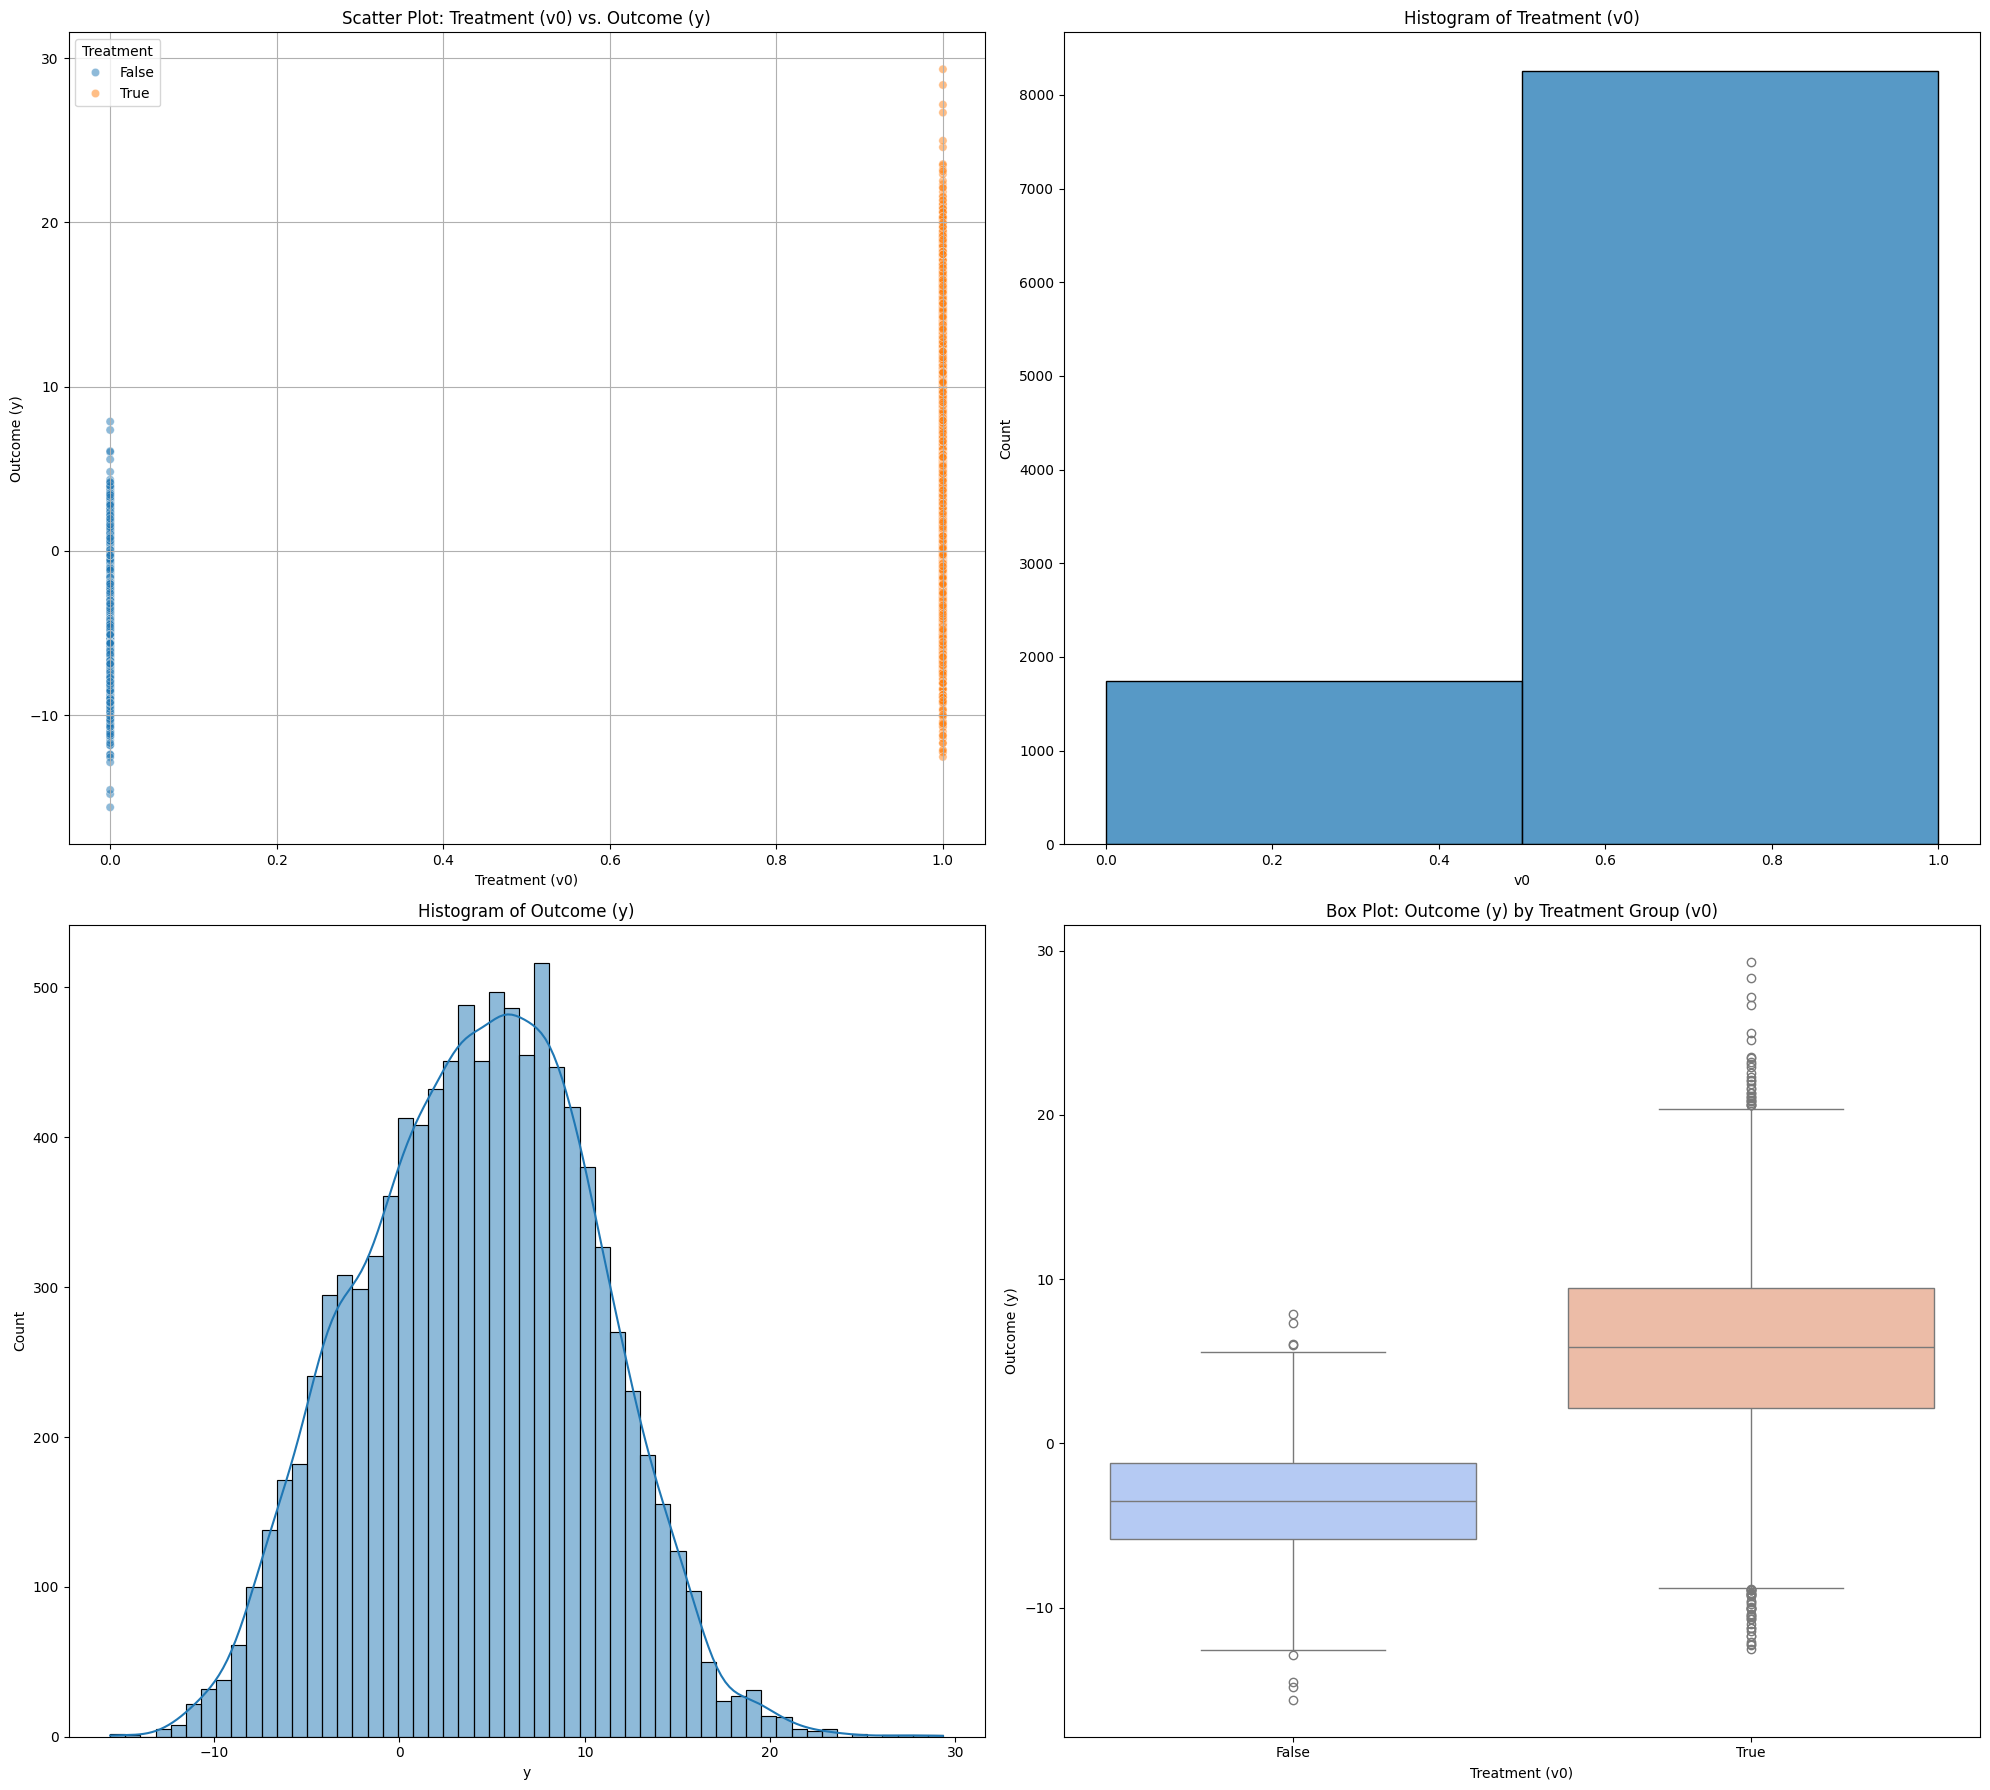

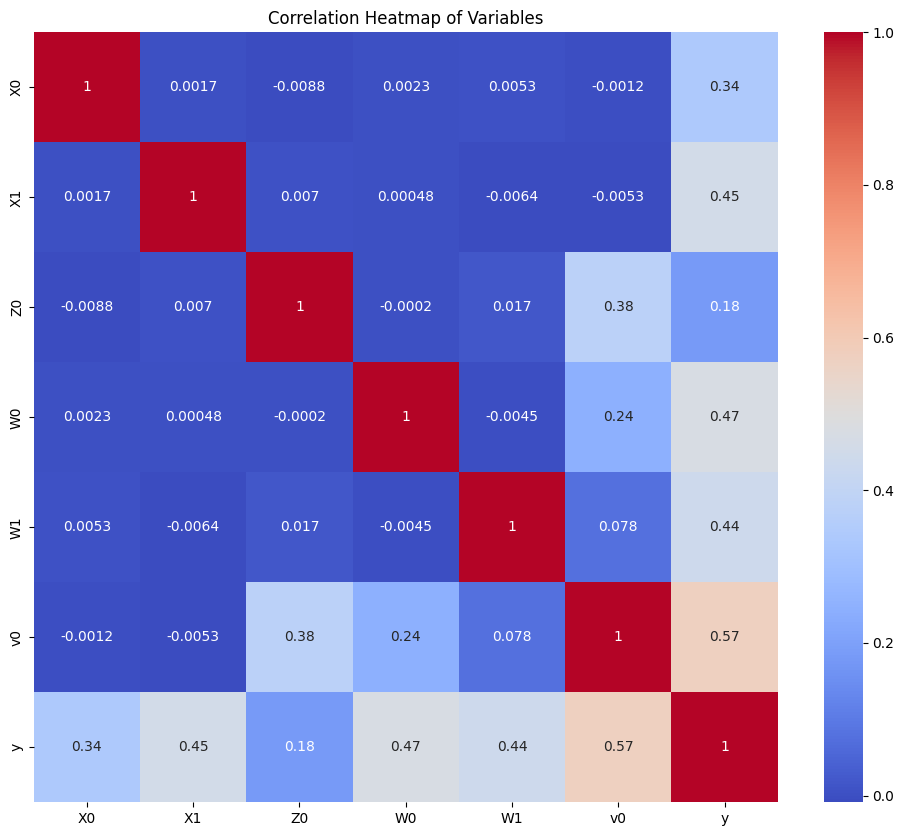

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame

fig, axs = plt.subplots(2, 2, figsize=(20, 18))

# Scatter Plot for Treatment (v0) vs. Outcome (y)
sns.scatterplot(data=df, x='v0', y='y', hue='v0', alpha=0.5, ax=axs[0, 0])
axs[0, 0].set_title('Scatter Plot: Treatment (v0) vs. Outcome (y)')
axs[0, 0].set_xlabel('Treatment (v0)')
axs[0, 0].set_ylabel('Outcome (y)')
axs[0, 0].legend(title='Treatment')
axs[0, 0].grid(True)

# Histogram of Treatment (v0)
sns.histplot(df['v0'], bins=2, ax=axs[0, 1])
axs[0, 1].set_title('Histogram of Treatment (v0)')

# Histogram of Outcome (y)
sns.histplot(df['y'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Histogram of Outcome (y)')

# Box Plot for Outcome (y) by Treatment Group (v0)
sns.boxplot(x='v0', y='y', data=df, palette='coolwarm', ax=axs[1, 1])
axs[1, 1].set_title('Box Plot: Outcome (y) by Treatment Group (v0)')
axs[1, 1].set_xlabel('Treatment (v0)')
axs[1, 1].set_ylabel('Outcome (y)')

plt.tight_layout()

# Correlation Heatmap in a separate figure for clarity
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Variables')

plt.show()

The treated group has a higher average than the untreated group. This is a strong signal of causality, but it is not enough. Spurious correlations occur!!
<br>
<br>
<br>
<br>


<img src="Images/scorr2.png">


While a correlation exists between variables, it does not imply a causal relationship. **There is no causal pathway!**

In theory, a machine learning model might leverage such a correlation to predict outcomes effectively, enhancing its predictive accuracy. However, it's crucial in practice to remain cautious of relying on spurious correlations that don't stem from a genuine causal link. This is particularly important as machine learning models can inadvertently amplify these non-causal relationships.

In contrast, causal inference mandates the identification of a causal pathway before deploying any analytical model. This prerequisite ensures that the effects we measure truly originate from the cause under investigation, not from confounded or coincidental relationships. Such rigor in establishing causality allows for more reliable and actionable insights, which are indispensable for informed decision-making and policy development.

## The model

### Causal model from the data and given graph

Let's build our model:

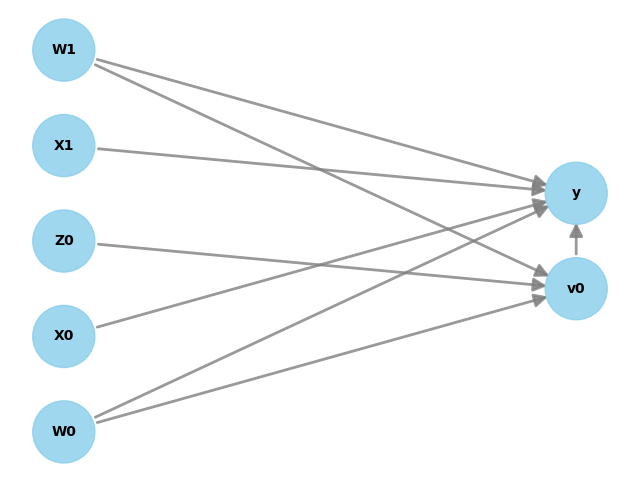

In [9]:
model = CausalModel(data=data['df'],
                   treatment=data['treatment_name'],
                   outcome=data['outcome_name'],
                   graph=data['gml_graph'])

model.view_model()

`model.view_model()` is a powerful way to visualize the causal assumptions of your model, represented as a Directed Acyclic Graph (DAG). This visualization is crucial for understanding how variables are assumed to interact causally within your model.

We have the following variables:

- We have **two confounders** (`W0` and `W1`) which have an effect on the treatment (`v0`) and the outcome (`y`), potentially leading to biased or spurious estimates of the treatment effect if not properly controlled for. In the context of causal inference, confounders are crucial because they can create a false appearance of a causal relationship between the treatment and the outcome or obscure a genuine causal relationship.

    The term "confounders" reflects their ability to confound or mix up the effect of the treatment on the outcome, making it challenging to isolate the true causal effect, and thereby simulating real-world scenarios where confounders must be considered to accurately estimate causal effects. . 

    **Application:** If you're studying the effect of exercise (treatment) on weight loss (outcome), factors like diet or genetic predisposition (confounders) can influence both the likelihood of a person engaging in exercise and their potential for weight loss. If these confounders are not accounted for, you might incorrectly attribute changes in weight solely to exercise. This feature allows researchers and analysts to model complex causal relationships and understand the importance of controlling for confounders in their analyses.

- We also have **one instrument variable (IVs)** (`Z0`) related only to the treatment. An instrumental variable is a variable that influences the treatment but has no direct effect on the outcome, except through the treatment. This unique characteristic makes IVs invaluable for identifying causal effects when there are unobserved confounders that both affect the treatment and the outcome.

    Many causal algorithms under an assumption of unconfoundedness require us to measure every possible confounder, which is often impossible in practice. What do we do if we cannot do an experiment, or if we cannot perfectly observe all possible confounders? Instrumental variables analysis is one of the oldest but most important ways for learning about causality using quasi-experimental data.

    **Exogeneity:** This means it shouldn’t share a direct cause-effect relationship with the outcome nor be affected by any unmeasured confounders that also affect the outcome.

    **Exclusion:** The only pathway through which the instrumental variable can affect the outcome is by influencing the treatment. This is also referred to as the exclusion restriction.

    **Application:** Estimation the effect of education on earnings. It's challenging to measure this effect directly due to confounders like innate ability or family background, which can influence both a person's level of education and their potential earnings. An instrumental variable for education might be the proximity to a college when an individual was growing up. The assumption is that living closer to a college increases the likelihood of obtaining more education, not because of innate ability or family background, but because of the easier access. At the same time, proximity to a college presumably doesn’t affect an individual’s earnings directly, only indirectly through its effect on education.


- Finally, we have two features (`X0` and `X1`) affecting the outcome. **Effect modifiers** are variables that modify or alter the effect of a treatment on an outcome. They help to understand how and when treatments will have different effects based on the characteristics of individuals or contexts.

    **Interaction with Treatment:** Effect modifiers interact with the treatment to influence the magnitude or direction of the treatment effect on the outcome. This means that the effect of the treatment can vary depending on the level or value of the effect modifier.

    **Stratification and Personalization:** Recognizing effect modifiers allows for the stratification of analysis by different groups (e.g., based on age, gender, socioeconomic status) to see how the treatment effect differs among these groups. This can be critical for personalized medicine or targeted policy interventions.

    **Statistical Analysis:** In statistical models, effect modifiers can be included as interaction terms to explore how the relationship between treatment and outcome changes across different levels of the effect modifier.

    **Application:** The effect of a new educational program (treatment) on student performance (outcome). An effect modifier might be the initial skill level of the students. The impact of the educational program might be more significant for students who start with a higher skill level compared to those with a lower initial skill level. In this scenario, the initial skill level modifies the effect of the educational program on student performance.

### Identify causal effect and return target estimands

Let's go back to our first example; features are variables that impact the outcome directly. In our example of ice cream sales, the temperature could be a feature, since cold temperatures likely mean less ice cream sales, no matter the discount.

We can now identify the different ways of measuring the treatment effect. 

`identify_effect()` method is useful to identify the causal effect of a treatment on an outcome, the output (`identified_estimand`), contains crucial information about the identified causal estimand based on the provided causal model.

In [11]:
identified_estimand= model.identify_effect(proceed_when_unidentifiable=True)

print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d              
─────(E[y|W0,W1])
d[v₀]            
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W0,W1,U) = P(y|v0,W0,W1)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                      -1⎤
 ⎢  d      ⎛  d        ⎞  ⎥
E⎢─────(y)⋅⎜─────([v₀])⎟  ⎥
 ⎣d[Z₀]    ⎝d[Z₀]      ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→{Z0})
Estimand assumption 2, Exclusion: If we remove {Z0}→{v0}, then ¬({Z0}→y)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



The first line of the causal model analysis indicates the type of causal estimand identified by the model. Specifically, `EstimandType.NONPARAMETRIC_ATE`.

- `ATE` stands for Average Treatment Effect, which is a measure of the average **effect of the treatment on the outcome across the entire population** being studied. The ATE is a central measure in causal inference, providing a comprehensive overview of the treatment's effect.

    This is different from looking at more specific effects, such as the effect only on those who received the treatment (Average Treatment Effect on the Treated - ATT) or those who did not (Average Treatment Effect on the Controls - ATC).

- `NONPARAMETRIC` qualifier indicates that the estimation approach does not assume a specific parametric form for the relationship between the treatment and the outcome. In other words, the method is flexible and does not rely on assumptions about the shape or form of the underlying causal relationships. Nonparametric methods can be particularly valuable when the true relationship between variables is complex or unknown, as they avoid the bias that can come from incorrect model specifications.

Then, `dowhy` has identifies three different causal estimands for estimating the effect of the treatment (`v0`) on the outcome (`y`). Each estimand represents a different approach or assumption set under which the causal effect can be estimated. Let's break down each one:

- Estimand : 1 | Estimand name: backdoor

 Since you have a valid backdoor estimand, you can use estimation methods that control for confounders to estimate the causal effect.

- Estimand : 2 | Estimand name: iv (Instrumental Variable)

 If you have a valid instrumental variable (`Z0`), and especially if there are concerns about unobserved confounding that the backdoor methods can't address.

- Estimand : 3 | Estimand name: frontdoor

 The message indicates that the algorithm did not identify any variables in your dataset that satisfy the criteria for a frontdoor estimand. The frontdoor criterion requires a set of variables that mediate the effect of the treatment on the outcome, where the treatment affects these mediators, which in turn affect the outcome, and where the treatment does not affect the outcome in any way that is not mediated by these variables.

### Estimate the target estimand using a statistical method

To make things easy we'll use Estimand #2: Intrumental variables. 

In [12]:
causal_estimate = model.estimate_effect(
    identified_estimand,
    method_name="iv.instrumental_variable")

print(causal_estimate)
print('-'*40, end='\n\n')
print('Treatment effect: ', causal_estimate.value)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: iv
Estimand expression:
 ⎡                      -1⎤
 ⎢  d      ⎛  d        ⎞  ⎥
E⎢─────(y)⋅⎜─────([v₀])⎟  ⎥
 ⎣d[Z₀]    ⎝d[Z₀]      ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→{Z0})
Estimand assumption 2, Exclusion: If we remove {Z0}→{v0}, then ¬({Z0}→y)

## Realized estimand
Realized estimand: Wald Estimator
Realized estimand type: EstimandType.NONPARAMETRIC_ATE
Estimand expression:
 ⎡ d    ⎤  -1⎡ d     ⎤
E⎢───(y)⎥⋅E  ⎢───(v₀)⎥
 ⎣dZ₀   ⎦    ⎣dZ₀    ⎦
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→{Z0})
Estimand assumption 2, Exclusion: If we remove {Z0}→{v0}, then ¬({Z0}→y)
Estimand assumption 3, treatment_effect_homogeneity: Each unit's treatment ['v0'] is affected in the same way by common causes of ['v0'] and ['y']
Estimand assumption 4, outcome_effect_homogeneity: Each unit's outcome ['y'] is affected in the same way by common caus

We fixed the theoretical value to 8 (BETA=8) in the synthetic data. Do you remember? 

**The method got very close to measuring the real effect of the treatment.**

# Model Evaluation

When using causal inference, we do not make predictions. While we know the correct theoretical value for our synthetic data (we fixed it previously), in the real world, there is no target, so we cannot report an error metric, like the MAE or the MSE.

We must evaluate the robustness of the model in identifying a causal effect under assumptions violation.

One way to test that is to add a random common cause. In this procedure, we add an independent random variable as a cause of the outcome. Since the variable is random and independent, it should not impact the our measure of the treatment effect.

- **Refutation Test:**

    The `refute_estimate` function is used to test how robust your estimated causal effect is against potential alternatives or perturbations. The purpose is to challenge the estimate and see if it holds up under different assumptions or when the data is slightly modified.

- **Random Common Cause:**
    
    The `random_common_cause` method adds a randomly generated confounder to the data and then re-estimates the causal effect to see how much the addition of this confounder affects the estimated causal effect. The idea is to simulate the effect that an unobserved confounder might have on the causal relationship.

    **Hypothesis:** If the causal estimate changes significantly after adding this random common cause, it suggests that the original estimate might be sensitive to the presence of unobserved confounding.

In [13]:
res_random=model.refute_estimate(identified_estimand, causal_estimate, method_name="random_common_cause")

print(res_random)

Refute: Add a random common cause
Estimated effect:7.8425627167492475
New effect:7.842562716749248
p value:1.0



Adding a random common cause does not change the measured effect. This is further supported by a p-value of 1 (beware of P-Values). We can conclude that the model is robust and we can trust its causal effect estimate.

**What Happens in the Background:**

When you run `model.refute_estimate` with the `random_common_cause` method:

- A new column is added to your dataset, filled with random values.

- This new column is treated as a potential confounder (even though it's just random noise).

- The causal effect is recalculated with this new "confounder" included in the model.

- The output compares the original causal effect estimate with the new estimate that includes the random confounder.

**Output Interpretation:**

- Estimated effect: This is the causal effect estimate obtained from your original model.

- New effect: This is the causal effect estimate recalculated with the additional random common cause.

**Analyzing the Output:**

- Consistency: If the new effect is similar to the original estimated effect, it suggests that your original model is robust against the potential omission of a confounder. This robustness adds credibility to your causal inference.

- Variability: If the new effect is substantially different from the original estimate, it may indicate that the model's estimate is sensitive to potential unobserved confounders. In such cases, further investigation or a reconsideration of the model's variables and assumptions might be necessary.

This method is part of a broader set of tools in dowhy designed to test and ensure the reliability of causal inferences, especially given the complex and often uncertain nature of observational data. Such tests help validate the strength and validity of your causal conclusions.

# Conclusion
We crash-coursed into the field of causal inference. Unlike in traditional machine learning, we are not doing predictions, but instead measuring the impact of a treatment on an outcome.

In real life, many things impact the outcome:

- confounders that affect the treatment and the outcome
- features that affect the outcome directly
- we can add instrument variables that correlate only with the treatment

There are methods to isolate the treatment effect and remove the bias of confounders and features, but domain knowledge and human inputs remain important to design the right causal graph and then use the right methods.

# References

For a gentle introduction (No math, whithout hassle):

<a href="https://en.wikipedia.org/wiki/The_Book_of_Why">The book of Why by Judea Pearl</a>
<img width="200" src="Images/book_of_why.jpg">
<br>


With Math & with hassle (not much):

<a href="https://www.amazon.com/Causal-Inference-Statistics-Judea-Pearl/dp/1119186846/ref=sr_1_2">Causal Inference in Statistics - A Primer</a>
<img width="200" src="Images/causal_primer.jpg">
<br>
    